In [1]:
# FINAL PROJECT IMPLEMENTATION

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import warnings
from sklearn.exceptions import ConvergenceWarning

import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Custom funtion for confusion matrices
def customConfusionMatrix(actual, pred, flag = 0):
    # Initialize the variables
    a1, a2, a3, a4 = 0, 0, 0, 0
    b1, b2, b3, b4 = 0, 0, 0, 0
    c1, c2, c3, c4 = 0, 0, 0, 0
    d1, d2, d3, d4 = 0, 0, 0, 0
    
    # Loop through the actual and predicted values
    for act, prd in zip(actual, pred):
        if act == prd:
            if act == 0:
                a1 += 1
            elif act == 1:
                b2 += 1
            elif act == 2:
                c3 += 1
            elif act == 3: 
                d4 += 1
        elif act == 0:
            if prd == 1:
                a2 += 1
            elif prd == 2:
                a3 += 1
            elif prd == 3:
                a4 += 1
        elif act == 1:
            if prd == 0:
                b1 += 1
            elif prd == 2:
                b3 += 1
            elif prd == 3: 
                b4 += 1
        elif act == 2:
            if prd == 0:
                c1 += 1
            elif prd == 1:
                c2 += 1
            elif prd == 3:
                c4 += 1
        elif act == 3:
            if prd == 0:
                d1 += 1
            elif prd == 1:
                d2 += 1
            elif prd == 2:
                d3 += 1
    
    # Create the confusion matrix
    confusion_matrix = [
        [a1, a2, a3, a4],
        [b1, b2, b3, b4],
        [c1, c2, c3, c4],
        [d1, d2, d3, d4]
    ]
    
#     fig, ax = plt.subplots()
#     tick_marks = np.arange(len(class_names))
#     plt.xticks(tick_marks, class_names, rotation=45)
#     plt.yticks(tick_marks, class_names)

#     sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')
#     ax.xaxis.set_label_position("top")
#     plt.tight_layout()
#     plt.title('Confusion matrix', y=1.1)
#     plt.ylabel('Actual Class')
#     plt.xlabel('Predicted Class')


#     if flag == 1:
#         plt.show()

    return confusion_matrix


# READ THE FILE IN 

In [3]:
all_df = pd.read_csv('all.csv')
future_df = pd.read_csv('future.csv')
meteorite_df = pd.read_csv('meteorite-landings.csv')

print(all_df.shape[0])
print(future_df.shape[0])
print(meteorite_df.shape[0])
print('\n')

for column, dtype in all_df.dtypes.items():
    print(f"{column}: {dtype}")


753
550
45716


index: int64
Object: object
Close-Approach (CA) Date (TDB)YYYY-mmm-DD HH:MM ± D_HH:MM: object
CA DistanceNominal(LD/AU): object
CA DistanceMinimum(LD/AU): object
Vrelative(km/s): float64
Vinfinity(km/s): float64
Nsigma: float64
H(mag): float64
ref: int64
class: object


# Noting the null or missing values

In [4]:
# Calculate the percentage of missing values for each column
missing_percentage = (all_df.isnull().sum() / len(all_df)) * 100

# Create a new DataFrame with columns and missing percentage
missing_df = pd.DataFrame({
    'Column': missing_percentage.index,
    'Missing Percentage': missing_percentage.values
})

print(missing_df)


                                               Column  Missing Percentage
0                                               index                 0.0
1                                              Object                 0.0
2   Close-Approach (CA) Date (TDB)YYYY-mmm-DD HH:M...                 0.0
3                           CA DistanceNominal(LD/AU)                 0.0
4                           CA DistanceMinimum(LD/AU)                 0.0
5                                     Vrelative(km/s)                 0.0
6                                     Vinfinity(km/s)                 0.0
7                                              Nsigma                 0.0
8                                              H(mag)                 0.0
9                                                 ref                 0.0
10                                              class                 0.0


# Converting some datatypes to numeric

In [5]:
# Rename to remove AU from title
all_df = all_df.rename(columns = {'CA DistanceNominal(LD/AU)': 'CA DistanceNominal(LD)', 'CA DistanceMinimum(LD/AU)': 'CA DistanceMinimum(LD)'})
all_df['CA DistanceNominal(LD)'] = all_df['CA DistanceNominal(LD)'].str.split('/').str[0]
all_df['CA DistanceMinimum(LD)'] = all_df['CA DistanceMinimum(LD)'].str.split('/').str[0]

# Convert columns to numeric
all_df['CA DistanceNominal(LD)'] = pd.to_numeric(all_df['CA DistanceNominal(LD)'], errors='coerce')
all_df['CA DistanceMinimum(LD)'] = pd.to_numeric(all_df['CA DistanceMinimum(LD)'], errors='coerce')


# Define a mapping from string values to integer values
class_mapping = {'APO*': 0, 'AMO*': 1, 'ATE*': 2, 'IEO*': 3}

# Create a new column 'class_int' based on the mapping
all_df['class_int'] = all_df['class'].map(class_mapping)


# Print the updated DataFrame
print(all_df.head(5))



   index             Object  \
0      0        (2015 TC25)   
1      1        (2017 FL63)   
2      2         (2017 FF3)   
3      3         (2017 FK3)   
4      4  215588 (2003 HF2)   

  Close-Approach (CA) Date (TDB)YYYY-mmm-DD HH:MM ± D_HH:MM  \
0                        2017-Mar-26 14:51 ±   00:06          
1                        2017-Mar-26 23:14 ±   00:01          
2                        2017-Mar-27 03:21 ±   00:02          
3                        2017-Mar-27 20:49 ±   00:01          
4                                2017-Mar-28 19:43 ±          

   CA DistanceNominal(LD)  CA DistanceMinimum(LD)  Vrelative(km/s)  \
0                    7.63                    7.59             3.31   
1                    4.16                    4.12            17.29   
2                    5.75                    5.74             2.89   
3                    9.08                    8.99             8.93   
4                   16.61                   16.61            22.89   

   Vinfinity(

# Dropping the columns not needed for our analysis, specifically:
    a) Close-Approach (CA) Date (TDB)YYYY-mmm-DD HH:M     (date object we dont know what to do with)
    b) ref                                                (metadata reference to the source of the data entry)

In [6]:
all_df = all_df[['CA DistanceNominal(LD)', 'Vrelative(km/s)', 'Vinfinity(km/s)', 'Nsigma', 'H(mag)', 'CA DistanceMinimum(LD)', 'class_int']]

for column, dtype in all_df.dtypes.items():
    print(f"{column}: {dtype}")


CA DistanceNominal(LD): float64
Vrelative(km/s): float64
Vinfinity(km/s): float64
Nsigma: float64
H(mag): float64
CA DistanceMinimum(LD): float64
class_int: int64


# Train Test Data Split

In [7]:
# Splitting the data
y_var = all_df['class_int']  
x_var = all_df.drop(columns = ['class_int'])
x_train, x_test, y_train, y_test = train_test_split(x_var, y_var, test_size = 0.35, random_state = 45)


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(489, 6)
(489,)
(264, 6)
(264,)


Run a simple forward selection to determince columns directly affecting the H(mag) col


# Classification of class 

Algos to consider:

1. Multiple Logstic Regression     (ANESU)
2. Decision Trees/Random Forests   (ANESU)
3. Simple Vector Machines(SVM)     (DEEKSITH)
4. K-nearest neighbours (KNN)      (JACKSON)
5. BONUS -> GNN                    (JACKSON)

# 1) Multiple Logistic Regression

In [8]:
# SCALED MULTIPLE LOGISTIC REGRESSION
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

logreg = LogisticRegression(random_state = 45, max_iter = 1000)

logreg.fit(x_train_scaled, y_train)

lr_y_pred = logreg.predict(x_test_scaled)

cnf_matrix = metrics.confusion_matrix(y_test, lr_y_pred)
print(cnf_matrix)

lr_accuracy = accuracy_score(y_test,lr_y_pred)
print(f"Accuracy: {lr_accuracy:.4f}")

lr_conf_matrix = customConfusionMatrix(y_test, lr_y_pred)



[[208   4   2   0]
 [ 22   1   0   0]
 [ 25   1   0   0]
 [  1   0   0   0]]
Accuracy: 0.7917


In [9]:
# UN-SCALED MULTIPLE LOGISTIC REGRESSION

model = LogisticRegression()
model.fit(x_train, y_train)

# Predictions
lr2_y_pred = model.predict(x_test)

# Accuracy score
lr_accuracy_unscaled = accuracy_score(y_test, lr2_y_pred)
print(f"Accuracy: {lr_accuracy_unscaled:.4f}")

# Confusion matrix
print("Confusion Matrix:")
lr2_conf_matrix = customConfusionMatrix(y_test, lr2_y_pred)

#print(lr2_conf_matrix)

Accuracy: 0.8106
Confusion Matrix:


Clearly no need to scale the data in this context. So we will optimize the unscaled model now

In [10]:
# Ignore warnings of illegal combinations of params. Model will ignore errors of params as well and continue
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = ConvergenceWarning)

# Create a pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter = 1000))
])

# Define hyperparameters to tune
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],  # Regularization parameter
    'logreg__penalty': ['l2', None, 'l1', 'elasticnet'],  # Penalty term
    'logreg__solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv = 5, scoring = 'accuracy', verbose = 1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
lr_best_params = grid_search.best_params_
print(f"Best Hyperparameters: {lr_best_params}")

# Predict using the best model
lr_best_y_pred = grid_search.predict(x_test)

# Calculate accuracy
lr_best_accuracy = accuracy_score(y_test, lr_best_y_pred)
print(f"Best Accuracy: {lr_best_accuracy:.4f}")

# Confusion matrix
print("Confusion Matrix:")
lr2_conf_matrix = customConfusionMatrix(y_test, lr_best_y_pred)


Fitting 5 folds for each of 192 candidates, totalling 960 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #10. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Matrix is singular.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #10. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinea

KeyboardInterrupt: 

# got the best params, now will use these for the final model

In [11]:
# Create a pipeline with scaling and logistic regression using the best hyperparameters
best_pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(C = 0.001, penalty = 'l2', solver = 'lbfgs', max_iter = 1000))
])

# Fit the model with the best hyperparameters on the training data
best_pipeline_lr.fit(x_train, y_train)

# Predict using the best model
y_pred_best_lr = best_pipeline_lr.predict(x_test)

# Calculate accuracy
accuracy_best_lr = accuracy_score(y_test, y_pred_best_lr)
print(f"Best Accuracy: {accuracy_best_lr:.4f}")

# Confusion matrix
print("Confusion Matrix:")
conf_matrix_best_lr = customConfusionMatrix(y_test, y_pred_best_lr)


Best Accuracy: 0.8106
Confusion Matrix:


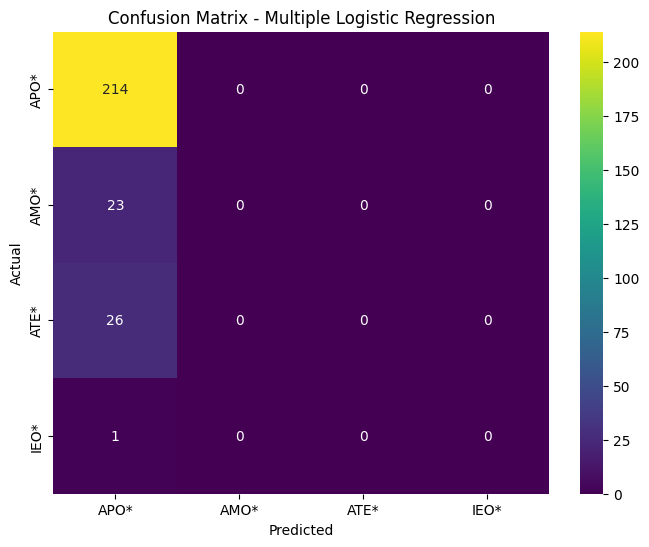

In [12]:

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_lr, annot=True, fmt='d', cmap='viridis', xticklabels=class_mapping.keys(), yticklabels=class_mapping.keys())
plt.title('Confusion Matrix - Multiple Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2) DECISION TREES


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Hyperparameters for Random Forest: {'rf__max_depth': None, 'rf__min_samples_leaf': 10, 'rf__min_samples_split': 2, 'rf__n_estimators': 10}
Best Accuracy for Random Forest: 0.8106
Confusion Matrix for Random Forest:


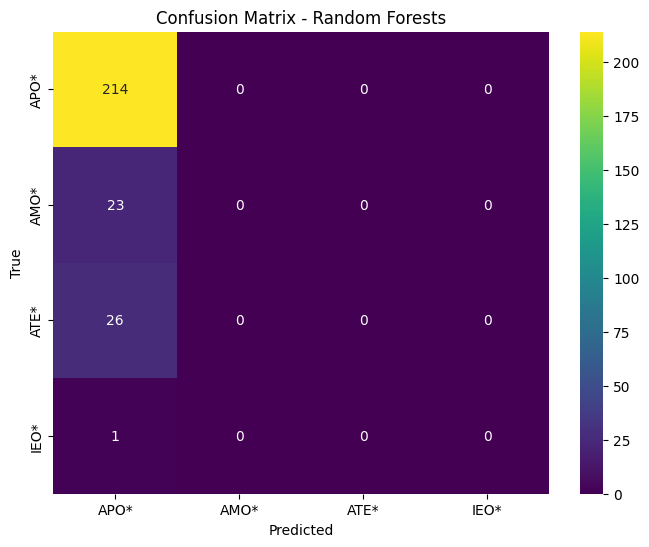

In [13]:

# Define the parameter grid for Random Forest
param_grid_rf = {
    'rf__n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'rf__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'rf__min_samples_split': [2, 5, 10, 20],  # Minimum number of samples required to split an internal node
    'rf__min_samples_leaf': [1, 2, 4, 6, 8, 10],  # Minimum number of samples required to be at a leaf node
}

param_grid_rf2 = {
    'rf__n_estimators': [10],  # Numbe of trees in the forest
    'rf__max_depth': [None],  # Maximum depth of the tree
    'rf__min_samples_split': [2],  # Minimum number of samples required to split an internal node
    'rf__min_samples_leaf': [10],  # Minimum number of samples required to be at a leaf node
}
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state = 45)

# Create a pipeline with scaling and Random Forest
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', rf_classifier),
])

# Use GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf2, cv = 5, scoring = 'accuracy', verbose = 1)

# Fit the grid search to the data
grid_search_rf.fit(x_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print(f"Best Hyperparameters for Random Forest: {best_params_rf}")

# Predict using the best Random Forest model
y_pred_best_rf = grid_search_rf.predict(x_test)

# Calculate accuracy
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Best Accuracy for Random Forest: {accuracy_best_rf:.4f}")

# Confusion matrix for Random Forest
print("Confusion Matrix for Random Forest:")
conf_matrix_best_rf = customConfusionMatrix(y_test, y_pred_best_rf)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_rf, annot=True, fmt='d', cmap='viridis', xticklabels=class_mapping.keys(), yticklabels=class_mapping.keys())
plt.title('Confusion Matrix - Random Forests')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



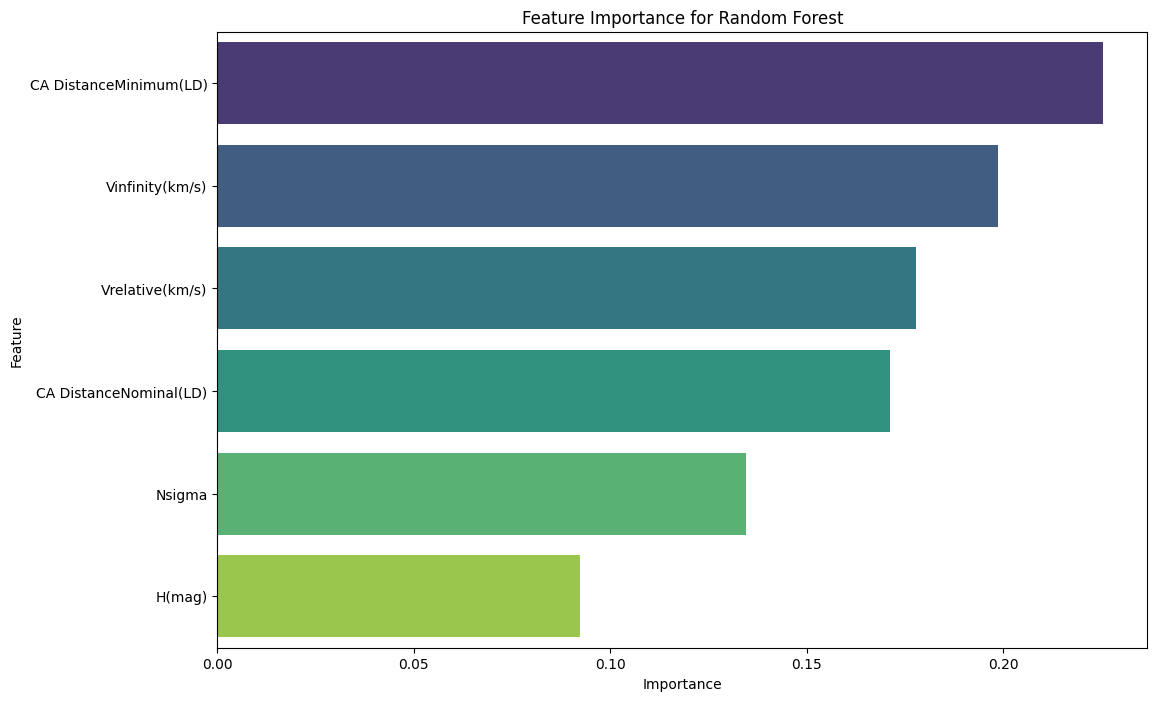

In [14]:
# Get the best Random Forest model from the grid search
best_rf_model = grid_search_rf.best_estimator_.named_steps['rf']

# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Get feature names from the original dataset
feature_names = x_train.columns  # Assuming x_train is your training set

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot for feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# 3) Simple Vector Machines

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Hyperparameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy for SVM: 0.8106
Accuracy for SVM: 0.8106


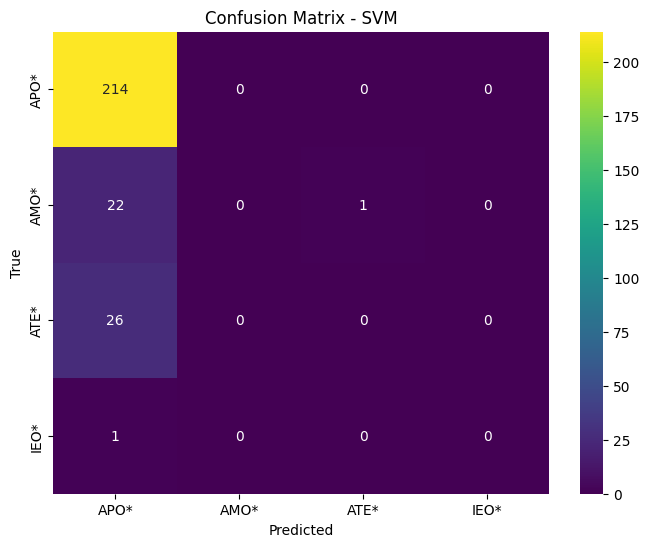

In [15]:
# SVM

# SVM Model
# Standardize the features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define SVM parameters to tune
param_grid_svm = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
}
# Create an SVM model
svm_model = SVC()
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv =5, scoring='accuracy', verbose=1)
grid_search_svm.fit(x_train_scaled, y_train)

# Get the best parameters
best_params_svm = grid_search_svm.best_params_
print(f"Best Hyperparameters for SVM: {best_params_svm}")

# Predict using the best SVM model
y_pred_svm = grid_search_svm.predict(x_test_scaled)

# Calculate accuracy for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy for SVM: {accuracy_svm:.4f}")

# Predict using the best SVM model
y_pred_svm = grid_search_svm.predict(x_test_scaled)

# Calculate accuracy for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy for SVM: {accuracy_svm:.4f}")

# Confusion Matrix
conf_mat_svm = confusion_matrix(y_test, y_pred_svm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_svm, annot=True, fmt='d', cmap='viridis', xticklabels=class_mapping.keys(), yticklabels=class_mapping.keys())
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# VISUALS



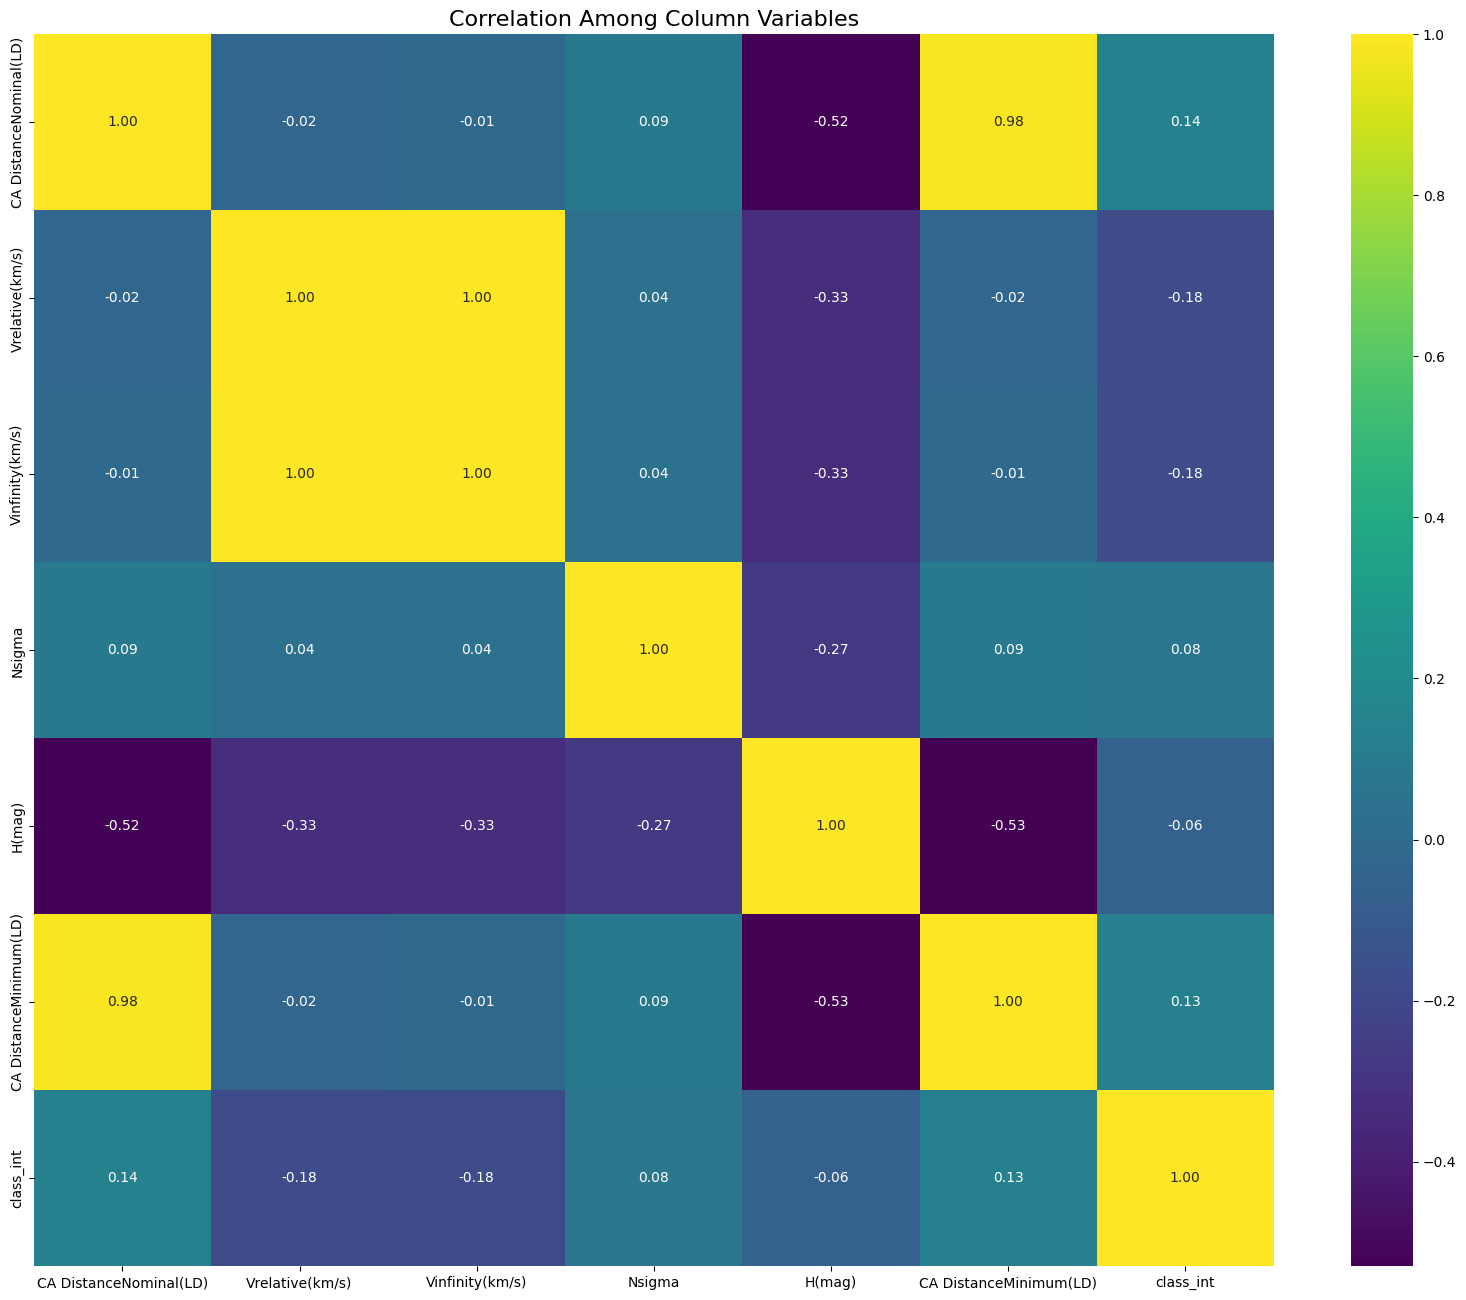

In [16]:
# Calculate the correlation matrix

selected_columns = all_df
correlation_matrix = selected_columns.corr()


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'correlation_matrix' is your calculated correlation matrix

# Plotting the heatmap using seaborn
plt.figure(figsize=(20, 16))  # Set the figure size

sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Among Column Variables', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


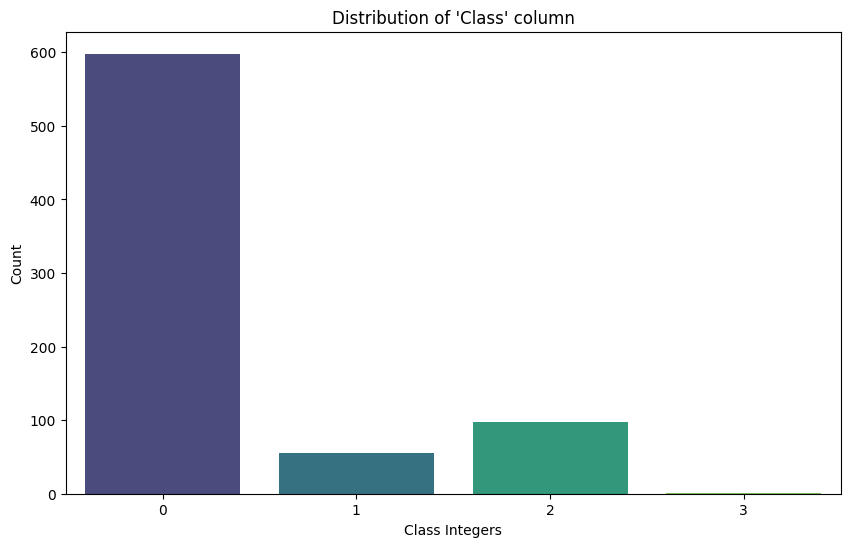

In [17]:

# Assuming all_df is your DataFrame
# Assuming "class_int" is the column you want to plot

# Count the occurrences of each unique value in the "class_int" column
value_counts = all_df['class_int'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")

# Set plot labels and title
plt.xlabel("Class Integers")
plt.ylabel("Count")
plt.title("Distribution of 'Class' column")

# Display the plot
plt.show()


# 4) KNN

[[68, 44, 3, 80], [9, 2, 0, 10], [10, 5, 1, 8], [0, 1, 0, 0]]
0    185
3    170
1     87
5     38
2      8
4      1
Name: Cluster, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


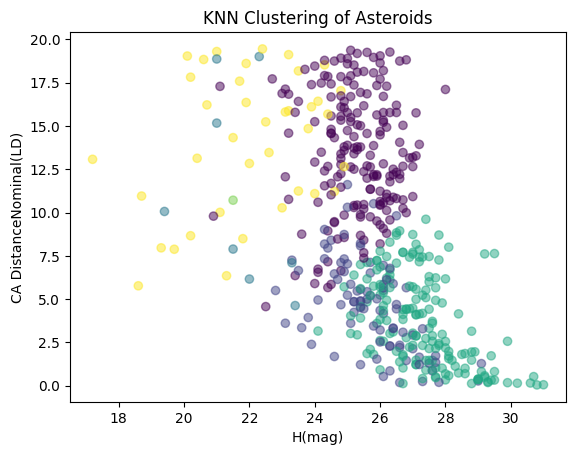

In [18]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

x_train_copy = x_train

# Assuming df contains your DataFrame with the specified columns
features = x_train[['CA DistanceNominal(LD)', 'Vrelative(km/s)', 'Nsigma', 'H(mag)']]

# Filling NaN values with mean of respective columns
features = features.fillna(features.mean())

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Initializing KMeans with the number of clusters
num_clusters = 6  # You can set the number of clusters as per your requirement
kmeans = KMeans(n_clusters=num_clusters)

# Fitting KMeans to the selected features
kmeans.fit(features_scaled)

# Getting cluster labels and assigning them to the DataFrame
x_train_copy['Cluster'] = kmeans.labels_

knn_conf = customConfusionMatrix(y_test,x_train_copy['Cluster'])

print(knn_conf)

# Displaying cluster counts
print(x_train_copy['Cluster'].value_counts())

plt.scatter(x_train_copy['H(mag)'], x_train_copy['CA DistanceNominal(LD)'], c=x_train_copy['Cluster'], cmap='viridis', alpha=0.5, label='Cluster')
plt.xlabel('H(mag)')
plt.ylabel('CA DistanceNominal(LD)')
plt.title('KNN Clustering of Asteroids')
plt.show()



#cluster_counts = df.groupby('Cluster')['class'].value_counts()
#print(cluster_counts)

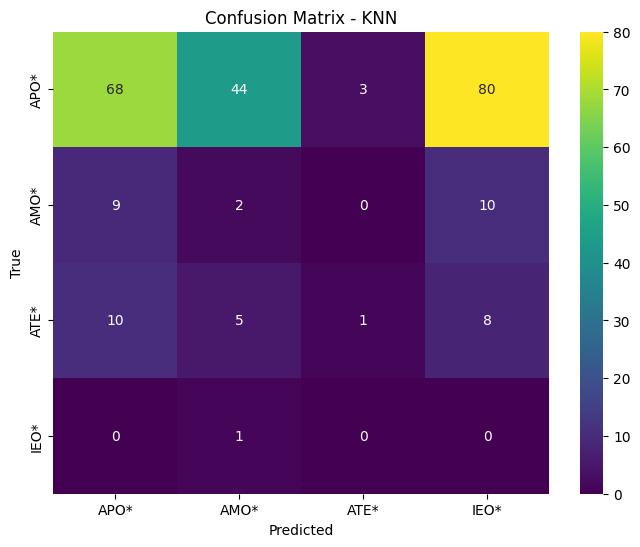

In [19]:
# KNN Confusion Matrix
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf, annot=True, fmt='d', cmap='viridis', xticklabels=class_mapping.keys(), yticklabels=class_mapping.keys())
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Optimizng our KNN Models

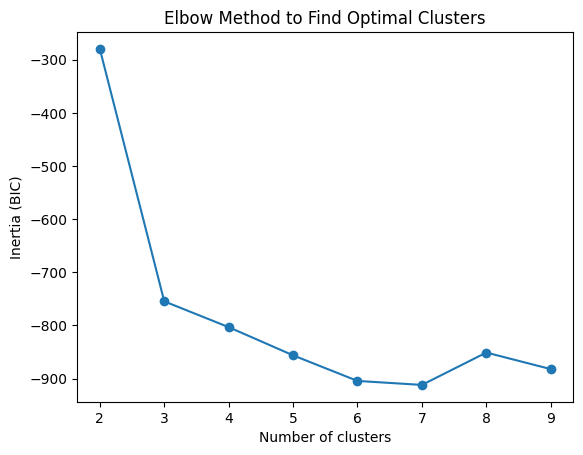

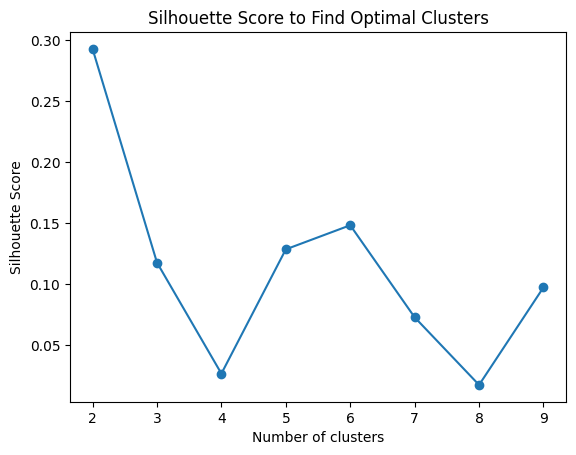

In [20]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# Extract relevant features for clustering
features = all_df[['CA DistanceNominal(LD)', 'Vrelative(km/s)', 'Nsigma', 'H(mag)']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Initialize lists to store inertia and silhouette scores
inertia = []
silhouette_scores = []

for n_clusters in range(2, 10):  # Try different numbers of clusters
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(features_scaled)
    inertia.append(gmm.bic(features_scaled))  # Use BIC (Bayesian Information Criterion) as a measure of model fit
    labels = gmm.predict(features_scaled)
    silhouette_scores.append(silhouette_score(features_scaled, labels))

# Plotting inertia to find the elbow point
plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (BIC)')
plt.title('Elbow Method to Find Optimal Clusters')
plt.show()

# Plotting silhouette scores
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score to Find Optimal Clusters')
plt.show()

# 5) BONUS: GNN

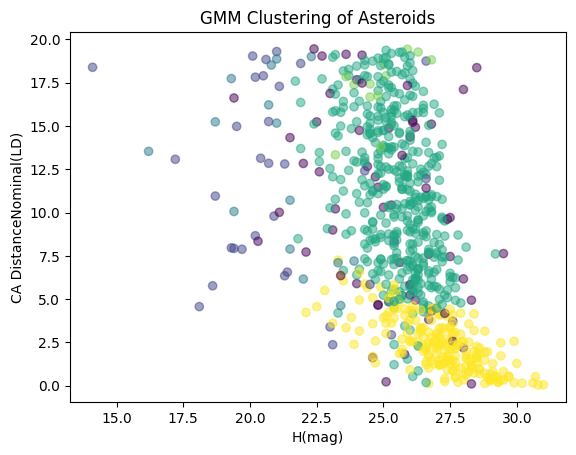

In [24]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Extract relevant features for clustering
features = all_df[['CA DistanceNominal(LD)', 'Vrelative(km/s)', 'Nsigma', 'H(mag)']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Initialize Gaussian Mixture Model
gmm = GaussianMixture(n_components=6, random_state=35)  # You can adjust the number of components

# Fit the model
gmm.fit(features_scaled)

# Add cluster labels to the original dataframe
all_df['cluster'] = gmm.predict(features_scaled)

# Visualize the clusters (you can modify this based on the number of features you choose)
plt.scatter(all_df['H(mag)'], all_df['CA DistanceNominal(LD)'], c=all_df['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('H(mag)')
plt.ylabel('CA DistanceNominal(LD)')
plt.title('GMM Clustering of Asteroids')
plt.show()


